<a href="https://colab.research.google.com/github/melaniefarneti/trabajofinal_farnetimelanie/blob/main/laboratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos de tabla Laboratorio

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import files
from google.colab import drive

# Para poder traer los datos desde drive.
drive.mount('/content/drive')

Mounted at /content/drive


## Extracción

In [ ]:
# Definir las rutas a los archivos (.XPT)
file_paths = [
    # 2000
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/laboratorio/colesterolldl-trigliceridos.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/laboratorio/colesteroltotal-ldl.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/laboratorio/ftalatos-fitoestrogenos-hap-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/laboratorio/glucemiaplasmatica-peptidoc-insulina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/laboratorio/hemoglobinaglucosilada.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/laboratorio/metales-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/laboratorio/perfilbioquimico-hormonas.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2000/laboratorio/proteinacreactiva.xpt',
    #2002
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/laboratorio/colesterolldl-trigliceridos.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/laboratorio/colesteroltotal-hdl.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/laboratorio/ftalatos-fitoestrogenos-hap-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/laboratorio/hemoglobinaglucosilada-glucosaplasmatica-peptidoc-insulina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/laboratorio/metales_orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/laboratorio/perfilbioquimico-hormonas.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2002/laboratorio/proteinacreactiva.xpt',
    #2004
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/laboratorio/colesterolldl-trigliceridos.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/laboratorio/colesteroltotal-hdl.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/laboratorio/fitoestrogenos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/laboratorio/ftalatos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/laboratorio/glucosaplasmatica-peptidoc-insulina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/laboratorio/hap-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/laboratorio/hemoglobinaglucosilada.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/laboratorio/metales-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/laboratorio/perfilbioquimico.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2004/laboratorio/proteinacreactiva.xpt',
    #2006
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/colesterolhdl.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/colesterolldl-trigliceridos.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/colesteroltotal.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/fitoestrogenos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/ftalatos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/glucosaplasmatica-insulina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/hap-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/hemoglobinaglucosilada.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/metales-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/perfilbioquimico.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2006/laboratorio/proteinacreactiva.xpt',
    #2008
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/colesterolhdl.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/colesterolldl-trigliceridos.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/colesteroltotal.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/fitoestrogenos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/ftalatos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/glucosaplasmatica-insulina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/hap-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/hemoglobinaglucosilada.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/metales-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/perfilbioquimico.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2008/laboratorio/proteinacreactiva.xpt',
    #2010
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/colesterolhdl.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/colesterolldl-trigliceridos.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/colesteroltotal.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/fitoestrogenos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/ftalatos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/glucosaplasmatica-insulina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/hap-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/hemoglobinaglucosilada.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/metales-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/perfilbioquimico.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2010/laboratorio/proteinacreactiva.xpt',
    #2012
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/laboratorio/colesterolhdl.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/laboratorio/colesterolldl-trigliceridos.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/laboratorio/colesteroltotal.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/laboratorio/ftalatos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/laboratorio/glucosaplasmatica-insulina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/laboratorio/hap-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/laboratorio/hemoglobinaglucosilada.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/laboratorio/metales-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2012/laboratorio/perfilbioquimico.xpt',
    #2014
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/laboratorio/colesterolhdl.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/laboratorio/colesterolldl-trigliceridos.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/laboratorio/colesteroltotal.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/laboratorio/ftalatos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/laboratorio/glucosaplasmatica.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/laboratorio/hap-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/laboratorio/hemoglobinaglucosilada.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/laboratorio/insulina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/laboratorio/metales-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2014/laboratorio/perfilbioquimico.xpt',
    #2016
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/colesterolhdl.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/colesterolldl-trigliceridos.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/colesteroltotal.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/ftalatos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/glucosaplasmatica.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/hap-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/hemoglobinaglucosilada.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/insulina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/metales-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/perfilbioquimico.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2016/laboratorio/proteinacreactiva.xpt',
    #2018
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/laboratorio/colesterolhdl.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/laboratorio/colesterolldl-trigliceridos.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/laboratorio/colesteroltotal.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/laboratorio/ftalatos-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/laboratorio/glucosaplasmatica.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/laboratorio/hemoglobinaglucosilada.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/laboratorio/insulina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/laboratorio/metales-orina.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/laboratorio/perfilbioquimico.xpt',
    '/content/drive/MyDrive/trabajofinal_farnetimelanie/nhanes_datos/2018/laboratorio/proteinacreactiva.xpt'
]

# Cargar cada archivo como un dataframe en una lista
dfs = [pd.read_sas(file) for file in file_paths]

In [ ]:
variables_interes = [
    'SEQN',
    'URXUCR',     # Creatinina, orina (mg/dL)
    'URXUBA',     # Bario, orina (ng/mL)
    'URXUBE',     # Berilio, orina (ng/mL)
    'URDUCD',     # Cadmio, orina (ng/mL)
    'URXUCO',     # Cobalto, orina (ng/mL)
    'URXUCS',     # Cesio, orina (ng/mL)
    'URXUMO',     # Molibdeno, orina (ng/mL)
    'URXUPB',     # Plomo en orina (ng/mL)
    'URXUPT',     # Platino, orina (ng/mL)
    'URXUSB',     # Antimonio, orina (ng/mL)
    'URXUTL',     # Talio, orina (ng/mL)
    'URXUTU',     # Tungsteno, orina (ng/mL)
    'URXMBP',     # Ftalato de mono-n-butilo (ng/mL)
    'URXMCP',     # Ftalato de monociclohexilo (ng/mL)
    'URXMEP',     # Ftalato de monoetilo (ng/mL)
    'URXMHP',     # Ftalato de mono-(2-etil)-hexilo (ng/mL)
    'URXMNP',     # Ftalato de monoisononilo (ng/mL)
    'URXMOP',     # Ftalato de mono-n-octilo (ng/mL)
    'URXMZP',     # Ftalato de monobencilo (ng/mL)
    'URXDAZ',     # Daidzeína (ng/mL)
    'URXDMA',     # o-Desmetilangolensina (O-DMA) (ng/mL)
    'URXEQU',     # Equol (ng/mL)
    'URXETD',     # Enterodiol (ng/ml)
    'URXETL',     # Enterolactona (ng/mL)
    'URXGNS',     # Genisteína (ng/mL)
    'URXP09',     # 3-fluoranteno (ng/L)
    "LBXCPSI",    # Péptido C: SI (nmol/L)
    "LBXIN",      # Insulina (uU/mL)
    "LBXSAL",     # Albúmina (g/dL)
    "LBXSATSI",   # ALT (superior/inferior)
    "LBXSASSI",   # AST (superior/inferior)
    "LBXSAPSI",   # Fosfatasa alcalina (U/L)
    "LBXSBU",     # Nitrógeno ureico en sangre (mg/dl)
    "LBXSCA",     # Calcio, total (mg/dL)
    "LBXSC3SI",   # Bicarbonato (mmol/L)
    "LBXSGTSI",   # GGT (superior/inferior)
    "LBXSGL",     # Glucosa (mg/dL)
    "LBXSIR",     # Hierro (ug/dL)
    "LBXSLDSI",   # LDH (bajo/bajo)
    "LBXSPH",     # Fósforo (mg/dL)
    "LBXSTB",     # Bilirrubina total (mg/dl)
    "LBXSTP",     # Proteína, total (g/dL)
    "LBXSUA",     # Ácido úrico (mg/dL)
    "LBXSNASI",   # Sodio (mmol/L)
    "LBXSKSI",    # Potasio (mmol/L)
    "LBXSCLSI",   # Cloruro (mmol/L)
    "LBXSOSSI",   # Osmolalidad (mOsm/kg)
    "LBXSGB",     # Globulina (g/dL)
    "LBXFSH",     # Hormona folículo estimulante (mIU/mL)
    "LBXLH",      # Hormona luteinizante (mIU/mL)
    "LBXGH",      # Glicohemoglobina (%)
    "LBXCRP",     # Proteína C reactiva (mg/dl)
    "LBXHP1",     # Helicobacter pylori (ISR)
    "LBXFB",      # Fibrinógeno (mg/dl)
    "LBXBAP",     # Fosfatasa alcalina ósea (ug/L)
    "LBXTR",      # Triglicéridos (mg/dL)
    "LBDLDL",     # Colesterol LDL (mg/dL)
    "LBXTC",      # Colesterol total (mg/dl)
    "LBDHDL",     # Colesterol HDL (mg/dL)
]


# Años correspondientes a cada DataFrame
year = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018]

# Crear un diccionario para almacenar los DataFrames filtrados
dataframes = {}

# Filtrar solo las variables de interés y asignar la columna de año
for i, (df, year) in enumerate(zip(dfs, year)):
    filtered_df = df.loc[:, df.columns.intersection(variables_interes)].copy()
    filtered_df['año'] = year
    dataframes[f'lab_{year}'] = filtered_df

# Concatenar todos los dataFrames en uno solo
lab = pd.concat(dataframes.values(), axis=0)

# Verificar las primeras filas del dataFrame combinado
print(lab)

         SEQN  LBXTR  LBDLDL   año  LBXTC  LBDHDL  URXMBP  URXMCP  URXMEP  \
0         2.0  128.0   136.0  2000    NaN     NaN     NaN     NaN     NaN   
1         3.0  202.0    58.0  2000    NaN     NaN     NaN     NaN     NaN   
2         5.0  347.0   168.0  2000    NaN     NaN     NaN     NaN     NaN   
3         7.0   62.0   127.0  2000    NaN     NaN     NaN     NaN     NaN   
4         8.0   33.0    88.0  2000    NaN     NaN     NaN     NaN     NaN   
...       ...    ...     ...   ...    ...     ...     ...     ...     ...   
9257  20999.0    NaN     NaN  2018  208.0    29.0     NaN     NaN     NaN   
9258  21000.0    NaN     NaN  2018  175.0    47.0     NaN     NaN     NaN   
9259  21002.0    NaN     NaN  2018  170.0    59.0     NaN     NaN     NaN   
9260  21003.0    NaN     NaN  2018  182.0    69.0     NaN     NaN     NaN   
9261  21004.0    NaN     NaN  2018  152.0    62.0     NaN     NaN     NaN   

      URXMHP  ...  LBXSKSI  LBXSCLSI  LBXSOSSI  LBXSGB  LBXFSH  LBXLH  LBXC

In [ ]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56307 entries, 0 to 9261
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      56307 non-null  float64
 1   LBXTR     7491 non-null   float64
 2   LBDLDL    6814 non-null   float64
 3   año       56307 non-null  int64  
 4   LBXTC     15716 non-null  float64
 5   LBDHDL    15711 non-null  float64
 6   URXMBP    2541 non-null   float64
 7   URXMCP    2541 non-null   float64
 8   URXMEP    2536 non-null   float64
 9   URXMHP    2541 non-null   float64
 10  URXMNP    2541 non-null   float64
 11  URXMOP    2541 non-null   float64
 12  URXMZP    2541 non-null   float64
 13  URXDAZ    2553 non-null   float64
 14  URXDMA    2271 non-null   float64
 15  URXEQU    2182 non-null   float64
 16  URXETD    2527 non-null   float64
 17  URXETL    2548 non-null   float64
 18  URXGNS    2557 non-null   float64
 19  URXP09    2236 non-null   float64
 20  URXUCR    5051 non-null   float64


In [ ]:
# Crear un diccionario con los nuevos nombres
nuevos_nombres = {
    'SEQN': 'id_paciente',
    'URXUCR': 'Creatinina, orina (mg/dL)',
    'URXUBA': 'Bario, orina (ng/mL)',
    'URXUBE': 'Berilio, orina (ng/mL)',
    'URDUCD': 'Cadmio, orina (ng/mL)',
    'URXUCO': 'Cobalto, orina (ng/mL)',
    'URXUCS': 'Cesio, orina (ng/mL)',
    'URXUMO': 'Molibdeno, orina (ng/mL)',
    'URXUPB': 'Plomo en orina (ng/mL)',
    'URXUPT': 'Platino, orina (ng/mL)',
    'URXUSB': 'Antimonio, orina (ng/mL)',
    'URXUTL': 'Talio, orina (ng/mL)',
    'URXUTU': 'Tungsteno, orina (ng/mL)',
    'URXMBP': 'Ftalato de mono-n-butilo (ng/mL)',
    'URXMCP': 'Ftalato de monociclohexilo (ng/mL)',
    'URXMEP': 'Ftalato de monoetilo (ng/mL)',
    'URXMHP': 'Ftalato de mono-(2-etil)-hexilo (ng/mL)',
    'URXMNP': 'Ftalato de monoisononilo (ng/mL)',
    'URXMOP': 'Ftalato de mono-n-octilo (ng/mL)',
    'URXMZP': 'Ftalato de monobencilo (ng/mL)',
    'URXDAZ': 'Daidzeína (ng/mL)',
    'URXDMA': 'o-Desmetilangolensina (O-DMA) (ng/mL)',
    'URXEQU': 'Equol (ng/mL)',
    'URXETD': 'Enterodiol (ng/ml)',
    'URXETL': 'Enterolactona (ng/mL)',
    'URXGNS': 'Genisteína (ng/mL)',
    'URXP09': '3-fluoranteno (ng/L)',
    "LBXCPSI": 'Péptido C: SI (nmol/L)',
    "LBXIN": 'Insulina (uU/mL)',
    "LBXSAL": 'Albúmina (g/dL)',
    "LBXSATSI": 'ALT (superior/inferior)',
    "LBXSASSI": 'AST (superior/inferior)',
    "LBXSAPSI": 'Fosfatasa alcalina (U/L)',
    "LBXSBU": 'Nitrógeno ureico en sangre (mg/dl)',
    "LBXSCA": 'Calcio, total (mg/dL)',
    "LBXSC3SI": 'Bicarbonato (mmol/L)',
    "LBXSGTSI": 'GGT (superior/inferior)',
    "LBXSGL": 'Glucosa (mg/dL)',
    "LBXSIR": 'Hierro (ug/dL)',
    "LBXSLDSI": 'LDH (bajo/bajo)',
    "LBXSPH": 'Fósforo (mg/dL)',
    "LBXSTB": 'Bilirrubina total (mg/dl)',
    "LBXSTP": 'Proteína, total (g/dL)',
    "LBXSUA": 'Ácido úrico (mg/dL)',
    "LBXSNASI": 'Sodio (mmol/L)',
    "LBXSKSI": 'Potasio (mmol/L)',
    "LBXSCLSI": 'Cloruro (mmol/L)',
    "LBXSOSSI": 'Osmolalidad (mOsm/kg)',
    "LBXSGB": 'Globulina (g/dL)',
    "LBXFSH": 'Hormona folículo estimulante (mIU/mL)',
    "LBXLH": 'Hormona luteinizante (mIU/mL)',
    "LBXGH": 'Glicohemoglobina (%)',
    "LBXCRP": 'Proteína C reactiva (mg/dl)',
    "LBXHP1": 'Helicobacter pylori (ISR)',
    "LBXFB": 'Fibrinógeno (mg/dl)',
    "LBXBAP": 'Fosfatasa alcalina ósea (ug/L)',
    "LBXTR": 'Triglicéridos (mg/dL)',
    "LBDLDL": 'Colesterol LDL (mg/dL)',
    "LBXTC": 'Colesterol total (mg/dl)',
    "LBDHDL": 'Colesterol HDL (mg/dL)',
}

# Renombrar las columnas en el DataFrame
lab.rename(columns=nuevos_nombres, inplace=True)

In [ ]:
lab.columns

Index(['id_paciente', 'Triglicéridos (mg/dL)', 'Colesterol LDL (mg/dL)', 'año',
       'Colesterol total (mg/dl)', 'Colesterol HDL (mg/dL)',
       'Ftalato de mono-n-butilo (ng/mL)',
       'Ftalato de monociclohexilo (ng/mL)', 'Ftalato de monoetilo (ng/mL)',
       'Ftalato de mono-(2-etil)-hexilo (ng/mL)',
       'Ftalato de monoisononilo (ng/mL)', 'Ftalato de mono-n-octilo (ng/mL)',
       'Ftalato de monobencilo (ng/mL)', 'Daidzeína (ng/mL)',
       'o-Desmetilangolensina (O-DMA) (ng/mL)', 'Equol (ng/mL)',
       'Enterodiol (ng/ml)', 'Enterolactona (ng/mL)', 'Genisteína (ng/mL)',
       '3-fluoranteno (ng/L)', 'Creatinina, orina (mg/dL)',
       'Péptido C: SI (nmol/L)', 'Insulina (uU/mL)', 'Glicohemoglobina (%)',
       'Bario, orina (ng/mL)', 'Berilio, orina (ng/mL)',
       'Cadmio, orina (ng/mL)', 'Cobalto, orina (ng/mL)',
       'Cesio, orina (ng/mL)', 'Molibdeno, orina (ng/mL)',
       'Plomo en orina (ng/mL)', 'Platino, orina (ng/mL)',
       'Antimonio, orina (ng/mL)', 'T

In [ ]:
lab.isnull().sum()

,0
id_paciente,0
Triglicéridos (mg/dL),48816
Colesterol LDL (mg/dL),49493
año,0
Colesterol total (mg/dl),40591
...,...
Hormona luteinizante (mIU/mL),55487
Proteína C reactiva (mg/dl),48814
Helicobacter pylori (ISR),48814
Fibrinógeno (mg/dl),53627


In [ ]:
# Especificar las funciones de agregación para cada columna
lab = lab.groupby('id_paciente').agg({
    'año': 'first',  # Tomar el primer valor del año
    **{col: (lambda x: x.mean() if x.dtype in [np.float64, np.int64] else x.first())
       for col in lab.columns if col not in ['id_paciente', 'año']}  # Promediar otras columnas numéricas
}).reset_index()

lab

,id_paciente,año,Triglicéridos (mg/dL),Colesterol LDL (mg/dL),Colesterol total (mg/dl),Colesterol HDL (mg/dL),Ftalato de mono-n-butilo (ng/mL),Ftalato de monociclohexilo (ng/mL),Ftalato de monoetilo (ng/mL),Ftalato de mono-(2-etil)-hexilo (ng/mL),...,Potasio (mmol/L),Cloruro (mmol/L),Osmolalidad (mOsm/kg),Globulina (g/dL),Hormona folículo estimulante (mIU/mL),Hormona luteinizante (mIU/mL),Proteína C reactiva (mg/dl),Helicobacter pylori (ISR),Fibrinógeno (mg/dl),Fosfatasa alcalina ósea (ug/L)
0,2.0,2000,128.0,136.0,215.0,54.0,NaN,NaN,NaN,NaN,...,4.06,104.5,288.0,2.7,NaN,NaN,0.36,1.36,323.0,13.5
1,3.0,2000,202.0,58.0,129.0,30.0,60.3,1.2792,115.434,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.17,NaN,118.9
2,5.0,2000,347.0,168.0,279.0,42.0,NaN,NaN,NaN,NaN,...,4.63,98.9,276.0,2.8,NaN,NaN,0.08,0.35,280.0,14.4
3,6.0,2002,NaN,NaN,153.0,61.0,NaN,NaN,NaN,NaN,...,4.16,104.0,277.0,3.5,NaN,NaN,0.06,1.77,NaN,19.2
4,7.0,2000,62.0,127.0,245.0,105.0,NaN,NaN,NaN,NaN,...,4.25,101.5,283.0,3.6,70.81,50.29,0.04,0.78,363.0,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17601,20999.0,2016,172.0,145.0,208.0,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17602,21000.0,2018,NaN,NaN,175.0,47.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17603,21002.0,2018,NaN,NaN,170.0,59.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17604,21003.0,2016,65.0,100.0,182.0,69.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Ordenar los registros en función de 'id_paciente' de menor a mayor
lab.sort_values(by='id_paciente', inplace=True)

# Verificar las primeras filas del DataFrame ordenado
print("DataFrame ordenado por 'id_paciente':")
lab

DataFrame ordenado por 'id_paciente':


,id_paciente,año,Triglicéridos (mg/dL),Colesterol LDL (mg/dL),Colesterol total (mg/dl),Colesterol HDL (mg/dL),Ftalato de mono-n-butilo (ng/mL),Ftalato de monociclohexilo (ng/mL),Ftalato de monoetilo (ng/mL),Ftalato de mono-(2-etil)-hexilo (ng/mL),...,Potasio (mmol/L),Cloruro (mmol/L),Osmolalidad (mOsm/kg),Globulina (g/dL),Hormona folículo estimulante (mIU/mL),Hormona luteinizante (mIU/mL),Proteína C reactiva (mg/dl),Helicobacter pylori (ISR),Fibrinógeno (mg/dl),Fosfatasa alcalina ósea (ug/L)
0,2.0,2000,128.0,136.0,215.0,54.0,NaN,NaN,NaN,NaN,...,4.06,104.5,288.0,2.7,NaN,NaN,0.36,1.36,323.0,13.5
1,3.0,2000,202.0,58.0,129.0,30.0,60.3,1.2792,115.434,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.17,NaN,118.9
2,5.0,2000,347.0,168.0,279.0,42.0,NaN,NaN,NaN,NaN,...,4.63,98.9,276.0,2.8,NaN,NaN,0.08,0.35,280.0,14.4
3,6.0,2002,NaN,NaN,153.0,61.0,NaN,NaN,NaN,NaN,...,4.16,104.0,277.0,3.5,NaN,NaN,0.06,1.77,NaN,19.2
4,7.0,2000,62.0,127.0,245.0,105.0,NaN,NaN,NaN,NaN,...,4.25,101.5,283.0,3.6,70.81,50.29,0.04,0.78,363.0,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17601,20999.0,2016,172.0,145.0,208.0,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17602,21000.0,2018,NaN,NaN,175.0,47.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17603,21002.0,2018,NaN,NaN,170.0,59.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17604,21003.0,2016,65.0,100.0,182.0,69.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Imputación de valores faltantes
!pip install fancyimpute scikit-learn

from sklearn.model_selection import train_test_split
from fancyimpute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=215a2b650e2aa576d4f3a41cbbd771f3243815a2a2b2640dc4d338a78e803fc4
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=e4380e252e0bf6882480e41643d6ad3cb96281c272727b67ccc31f508fbecbd7
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [ ]:
# Seleccionar las columnas numéricas
numerical_cols = lab.select_dtypes(include=['float64', 'int64']).columns

# Dividir en datos con valores completos y con valores nulos
data_complete = lab.dropna(subset=numerical_cols)
data_missing = lab[numerical_cols].copy()

In [ ]:
data_complete

,id_paciente,año,Triglicéridos (mg/dL),Colesterol LDL (mg/dL),Colesterol total (mg/dl),Colesterol HDL (mg/dL),Ftalato de mono-n-butilo (ng/mL),Ftalato de monociclohexilo (ng/mL),Ftalato de monoetilo (ng/mL),Ftalato de mono-(2-etil)-hexilo (ng/mL),...,Potasio (mmol/L),Cloruro (mmol/L),Osmolalidad (mOsm/kg),Globulina (g/dL),Hormona folículo estimulante (mIU/mL),Hormona luteinizante (mIU/mL),Proteína C reactiva (mg/dl),Helicobacter pylori (ISR),Fibrinógeno (mg/dl),Fosfatasa alcalina ósea (ug/L)


In [ ]:
# Aplicar MICE
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
mice_imputed = mice_imputer.fit_transform(data_missing)

KeyboardInterrupt: 

In [ ]:
# Configurar MissForest
missforest_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=50, random_state=42), max_iter=5)
missforest_imputed = missforest_imputer.fit_transform(data_missing)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
# Configurar KNN-Imputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = knn_imputer.fit_transform(data_missing)

In [ ]:
# Imputar cada columna faltante con DecisionTree
tree_imputed = data_missing.copy()
for col in numerical_cols:
    missing_indices = tree_imputed[tree_imputed[col].isnull()].index
    if len(missing_indices) > 0:
        # Crear datos de entrenamiento
        train_data = tree_imputed.dropna(subset=[col])
        X_train = train_data.drop(columns=[col])
        y_train = train_data[col]

        # Entrenar modelo y predecir valores faltantes
        tree_model = DecisionTreeRegressor(random_state=42)
        tree_model.fit(X_train, y_train)
        tree_imputed.loc[missing_indices, col] = tree_model.predict(tree_imputed.loc[missing_indices].drop(columns=[col]))

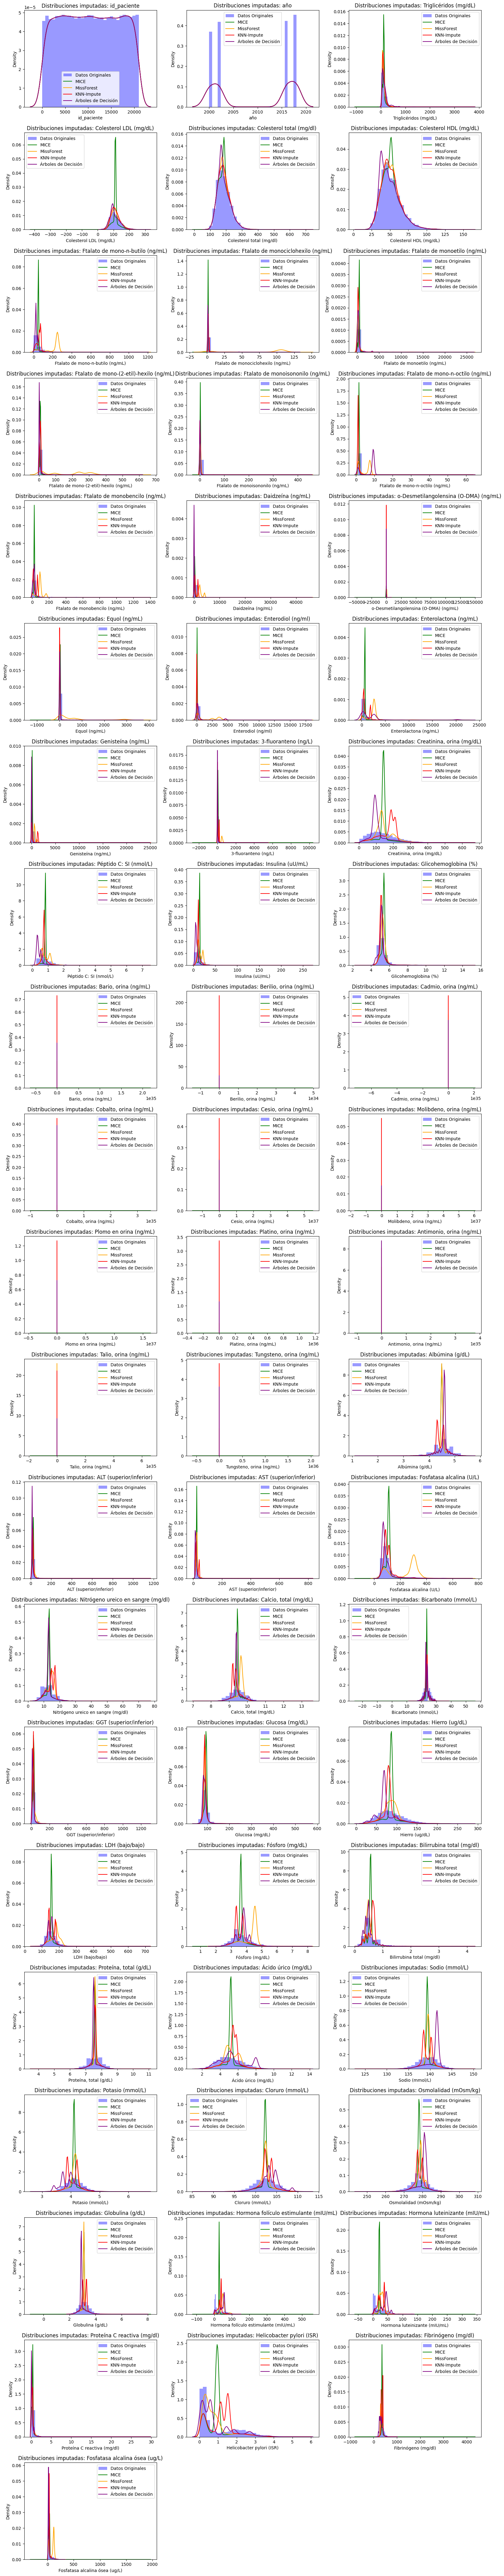

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Número de columnas en la grilla
n_cols = 3
numerical_cols = data_missing.select_dtypes(include=['float64', 'int64']).columns

# Crear grilla de gráficos
n_rows = int(np.ceil(len(numerical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    # Histograma para los datos originales
    ax.hist(lab[col].dropna(), bins=30, label='Datos Originales', color='blue', alpha=0.4, density=True)

    # Graficar las distribuciones por cada método
    sns.kdeplot(data_complete[col], label='Datos Originales', ax=ax, color='blue')
    sns.kdeplot(mice_imputed[:, i], label='MICE', ax=ax, color='green')
    sns.kdeplot(missforest_imputed[:, i], label='MissForest', ax=ax, color='orange')
    sns.kdeplot(knn_imputed[:, i], label='KNN-Impute', ax=ax, color='red')
    sns.kdeplot(tree_imputed[col], label='Árboles de Decisión', ax=ax, color='purple')

    ax.set_title(f'Distribuciones imputadas: {col}')
    ax.legend()

# Ocultar subplots vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Convertir el resultado a DataFrame con las mismas columnas originales
missforest_imputed_df = pd.DataFrame(missforest_imputed, columns=data_missing.columns, index=data_missing.index)

# Verificar si quedan valores nulos
missforest_imputed_df.isnull().sum()

,0
id_paciente,0
año,0
Triglicéridos (mg/dL),0
Colesterol LDL (mg/dL),0
Colesterol total (mg/dl),0
...,...
Hormona luteinizante (mIU/mL),0
Proteína C reactiva (mg/dl),0
Helicobacter pylori (ISR),0
Fibrinógeno (mg/dl),0


In [ ]:
lab = pd.read_csv('/content/laboratorio.csv')

In [ ]:
lab = lab.applymap(lambda x: 0 if isinstance(x, str) and 'e' in x else x)

<ipython-input-20-80645db22655>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  lab = lab.applymap(lambda x: 0 if isinstance(x, str) and 'e' in x else x)


In [ ]:
lab

,id_paciente,año,Triglicéridos (mg/dL),Colesterol LDL (mg/dL),Colesterol total (mg/dl),Colesterol HDL (mg/dL),Ftalato de mono-n-butilo (ng/mL),Ftalato de monociclohexilo (ng/mL),Ftalato de monoetilo (ng/mL),Ftalato de mono-(2-etil)-hexilo (ng/mL),...,Potasio (mmol/L),Cloruro (mmol/L),Osmolalidad (mOsm/kg),Globulina (g/dL),Hormona folículo estimulante (mIU/mL),Hormona luteinizante (mIU/mL),Proteína C reactiva (mg/dl),Helicobacter pylori (ISR),Fibrinógeno (mg/dl),Fosfatasa alcalina ósea (ug/L)
0,2.0,2000.0,128.00,136.00,215.0,54.0,258.320,38.194392,1027.19628,15.988,...,4.0600,104.500,288.00,2.7,48.4590,35.0692,0.3600,1.3600,323.00,13.500
1,3.0,2000.0,202.00,58.00,129.0,30.0,60.300,1.279200,115.43400,0.800,...,4.3250,104.114,279.88,3.1,97.7026,45.6960,0.0200,0.1700,311.52,118.900
2,5.0,2000.0,347.00,168.00,279.0,42.0,248.914,106.945524,865.58076,298.924,...,4.6300,98.900,276.00,2.8,43.8106,31.2272,0.0800,0.3500,280.00,14.400
3,6.0,2002.0,82.06,77.86,153.0,61.0,252.696,31.216044,255.59820,17.822,...,4.1600,104.000,277.00,3.5,51.6570,36.8922,0.0600,1.7700,343.08,19.200
4,7.0,2000.0,62.00,127.00,245.0,105.0,257.956,3.824904,428.43108,17.612,...,4.2500,101.500,283.00,3.6,70.8100,50.2900,0.0400,0.7800,363.00,12.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17601,20999.0,2016.0,172.00,145.00,208.0,29.0,241.060,98.990316,137.84760,15.524,...,4.2022,102.188,277.96,3.1,53.6796,32.3724,0.0604,0.7278,306.44,102.650
17602,21000.0,2018.0,136.40,102.96,175.0,47.0,247.388,105.573240,135.28152,89.808,...,4.1358,102.488,279.48,3.1,34.9190,21.3418,0.0458,0.3822,296.88,115.496
17603,21002.0,2018.0,99.86,90.28,170.0,59.0,57.072,99.113472,129.49596,244.630,...,4.1506,102.848,278.04,3.1,46.7178,25.6596,0.1192,0.5716,332.64,111.926
17604,21003.0,2016.0,65.00,100.00,182.0,69.0,247.546,105.476760,117.36120,91.844,...,4.0928,102.814,279.60,3.1,36.3544,22.4054,0.1506,0.3488,322.66,123.508


In [ ]:
lab.isnull().sum()

,0
id_paciente,0
año,0
Triglicéridos (mg/dL),0
Colesterol LDL (mg/dL),0
Colesterol total (mg/dl),0
...,...
Hormona luteinizante (mIU/mL),0
Proteína C reactiva (mg/dl),0
Helicobacter pylori (ISR),0
Fibrinógeno (mg/dl),0


In [ ]:
lab.to_csv('laboratorio.csv', index=False)

from google.colab import files
files.download('laboratorio.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>